# Simulating the value of a software project

In [5]:
# Import key Python libraries and packages that we need to process and analyze our data
import pandas as pd
from datetime import datetime
import numpy as np
from numpy import random as npr
import matplotlib.pyplot as plt

np.random.seed(101)

# Specify model constants per full-time equivalent (fte)
daily_rate = 400
technology_charges = 500
overhead_charges = 200
# Specify other constants
tax_rate = 0.15
# Specify model risk factors that have little or no correlation among them.
# Number of trials/simulations
n = 10000
# Number of full-time equivalent persons on the team
fte = npr.uniform(low=1, high=5, size=n)
# In person days and driven independently by the scope of the project
effort = npr.uniform(low=240, high=480, size=n)
# Based on market research or expert judgment or both
price = npr.uniform(low=100, high=200, size=n)
# Independent of price in the price range considered
units = npr.normal(loc=1000, scale=500, size=n)
# Discount rate for the project period based on risk of similar efforts
discount_rate = npr.uniform(low=0.06, high=0.10, size=n)

# Specify how risk factors affect the project model
labor_costs = effort * daily_rate
technology_costs = fte * technology_charges
overhead_costs = fte * overhead_charges
revenues = price * units

# Duration determines the number of days the project will take to complete assuming no interruption.
duration = effort/fte

# Specify target_value
free_cash_flow = (revenues - labor_costs - technology_costs - overhead_costs) * (1 - tax_rate)
# Simulate project NPV assuming initial FCF=0
npv = free_cash_flow/(1 + discount_rate)
# Convert numpy array to pandas dataframe for easier analysis
NPV = pd.DataFrame(npv, columns=['NPV'])
# Estimate project duration in days
Duration = pd.DataFrame(duration, columns=['Days'])


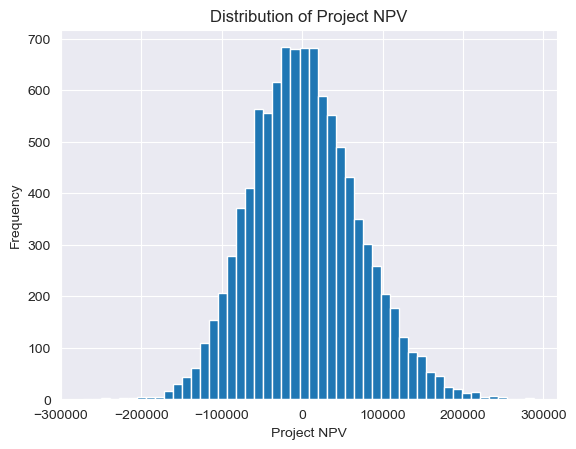

            NPV
count   10000.0
mean     3370.0
std     67024.0
min   -272139.0
25%    -42972.0
50%       -22.0
75%     45516.0
max    288188.0
There is a 50% probability that the project will have a positive NPV.


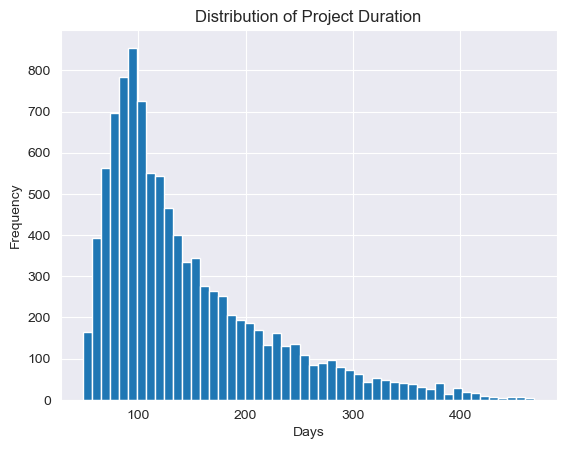

          Days
count  10000.0
mean     144.0
std       76.0
min       49.0
25%       89.0
50%      120.0
75%      179.0
max      469.0
There is a 75% probability that the project duration will be less than 180 days.


In [6]:
# Plot histogram of NPV distribution
plt.hist(NPV['NPV'], bins=50), plt.title ('Distribution of Project NPV'), plt.xlabel('Project NPV'), plt.ylabel('Frequency'), plt.show();
print(NPV.describe().round())
success_probability = sum(NPV['NPV'] > 0)/n *100
print('There is a {0}% probability that the project will have a positive NPV.'.format(round(success_probability)))
# Plot histogram of project duration distribution
plt.hist(Duration['Days'], bins=50), plt.title ('Distribution of Project Duration'), plt.xlabel('Days'), plt.ylabel('Frequency'), plt.show();
print(Duration.describe().round())
min_duration = sum(Duration['Days'] < 180)/n *100
print('There is a {0}% probability that the project duration will be less than 180 days.'.format(round(min_duration)))